In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
routes = pd.read_csv('final_routes.csv')

In [3]:
routes.head()

,Unnamed: 0,Airline_Name,Airline_IATA,Source_airport,Airport_Name_s,City_s,Country_s,Latitude_s,Longitude_s,Destination_airport,Airport_Name_d,City_d,Country_d,Latitude_d,Longitude_d,Equipment
0,0,Aerocondor,2B,ASF,Astrakhan Airport,Astrakhan,Russia,46.283298,48.006302,KZN,Kazan International Airport,Kazan,Russia,55.606201,49.278702,CR2
1,1,Aerocondor,2B,ASF,Astrakhan Airport,Astrakhan,Russia,46.283298,48.006302,MRV,Mineralnyye Vody Airport,Mineralnye Vody,Russia,44.225101,43.081902,CR2
2,2,Aerocondor,2B,CEK,Chelyabinsk Balandino Airport,Chelyabinsk,Russia,55.305801,61.503300,KZN,Kazan International Airport,Kazan,Russia,55.606201,49.278702,CR2
3,3,Aerocondor,2B,CEK,Chelyabinsk Balandino Airport,Chelyabinsk,Russia,55.305801,61.503300,OVB,Tolmachevo Airport,Novosibirsk,Russia,55.012600,82.650703,CR2
4,4,Aerocondor,2B,DME,Domodedovo International Airport,Moscow,Russia,55.408798,37.906300,KZN,Kazan International Airport,Kazan,Russia,55.606201,49.278702,CR2


In [4]:
routes['Airline_Name'].value_counts()

Ryanair              2484
American Airlines    2354
United Airlines      2180
Delta Air Lines      1981
US Airways           1960
                     ... 
Air Sinai               2
Eagle Air               2
Helijet                 2
Fly 6ix                 2
Eurowings               1
Name: Airline_Name, Length: 694, dtype: int64

In [5]:
plot_df = (
    routes['Airline_Name'].value_counts()
        .head(10)
        .rename_axis('Airline_Name')
        .reset_index(name='no_of_routes')
)
plot_df

,Airline_Name,no_of_routes
0,Ryanair,2484
1,American Airlines,2354
2,United Airlines,2180
3,Delta Air Lines,1981
4,US Airways,1960
5,China Southern Airlines,1454
6,China Eastern Airlines,1263
7,Air China,1260
8,Southwest Airlines,1146
9,United Feeder Service,1130


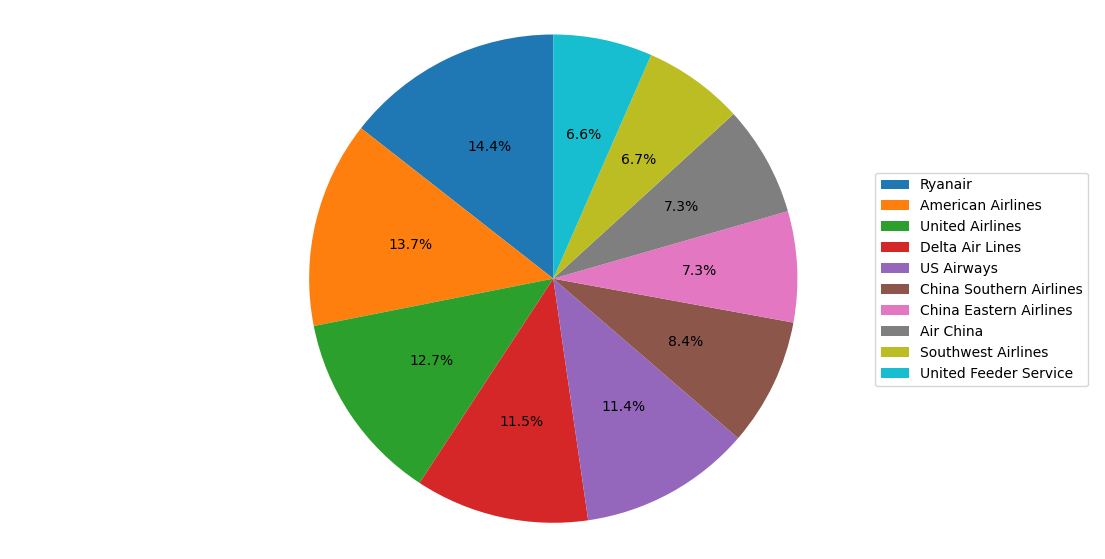

In [6]:
plt.figure(figsize=(14,7))
y=  routes['Airline_Name'].value_counts().head(10)
mylabels = plot_df['Airline_Name']
#plt.pie(y,labels=mylabels)
#plt.show()
pie = plt.pie(y,autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.legend( loc = 'right', labels=mylabels)
plt.show()

In [7]:
routes['Source_airport'].value_counts()

ATL    938
FRA    680
CDG    589
ORD    570
PEK    561
      ... 
KHD      1
AGN      1
ELV      1
PEC      1
WYA      1
Name: Source_airport, Length: 3409, dtype: int64

In [8]:
routes['Destination_airport'].value_counts()

ATL    934
FRA    673
CDG    580
ORD    561
PEK    560
      ... 
ILY      1
CAL      1
BRR      1
SPB      1
GFN      1
Name: Destination_airport, Length: 3418, dtype: int64

In [9]:
plot_df = (
    routes['Source_airport'].value_counts()
        .rename_axis('Airport_Name_s')
        .reset_index(name='no_of_flights_o')
)
plot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3409 entries, 0 to 3408
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airport_Name_s   3409 non-null   object
 1   no_of_flights_o  3409 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 53.4+ KB


In [10]:
plot_df1 = (
    routes['Destination_airport'].value_counts()
        .rename_axis('Airport_Name_d')
        .reset_index(name='no_of_flights_i')
)
plot_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3418 entries, 0 to 3417
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airport_Name_d   3418 non-null   object
 1   no_of_flights_i  3418 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 53.5+ KB


In [11]:
a =  list(routes['Airport_Name_s'].value_counts())

In [12]:
plot_df2= pd.merge(left = plot_df, 
                 right = plot_df1,
                 how= 'outer',
                 left_on='Airport_Name_s',
                 right_on='Airport_Name_d',
                 suffixes=('_x', '_y'))
plot_df2 = plot_df2.head(10)

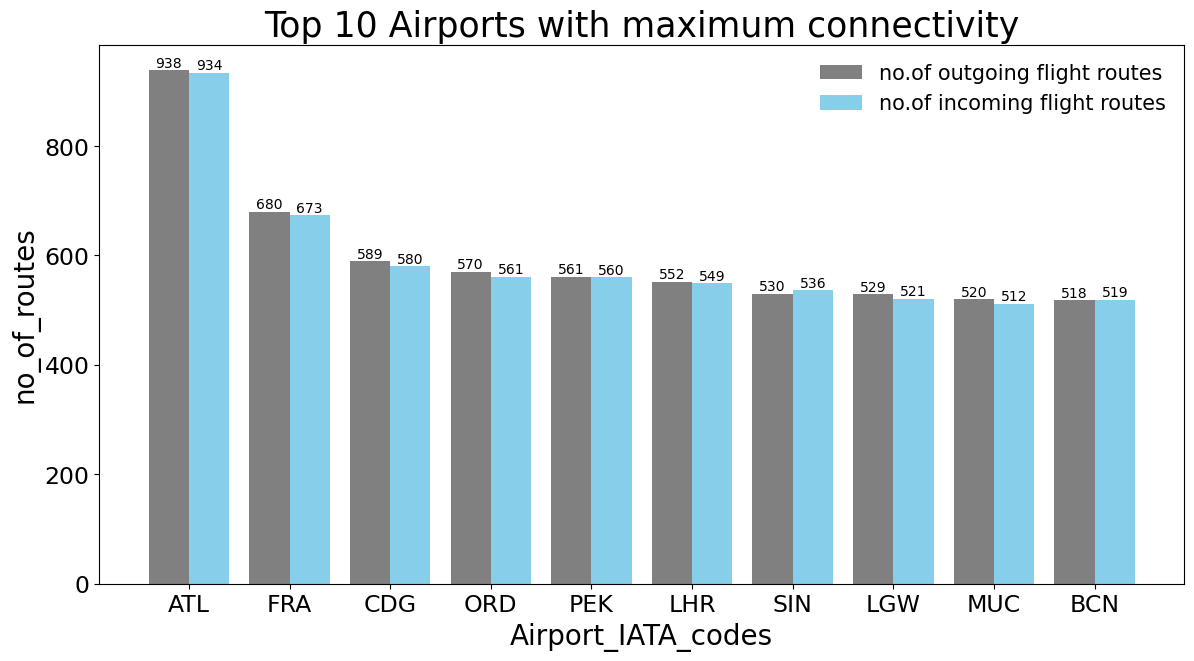

In [31]:
fig, ax = plt.subplots(figsize=(14,7))
x = np.arange(len(plot_df2))
width = 0.4
p1 = plt.bar(x-0.2, plot_df2['no_of_flights_o'],width, color='grey', label='no.of outgoing flight routes')
p2 = plt.bar(x+0.2, plot_df2['no_of_flights_i'],width, color='skyblue', label='no.of incoming flight routes')

plt.bar_label(p1, label_type='edge')
plt.bar_label(p2, label_type='edge')

plt.title('Top 10 Airports with maximum connectivity', fontsize=25)
plt.xlabel('Airport_IATA_codes', fontsize=20)
plt.xticks(plot_df2.index, plot_df2['Airport_Name_s'], fontsize=17)
plt.ylabel('no_of_routes', fontsize=20)
plt.yticks(fontsize=17)
#sns.despine(bottom=True)
plt.legend(frameon=False, fontsize=15)
plt.show()

In [ ]:
folium_df = pd.merge(left = plot_df2, 
                 right = airline_routes1,
                 how= 'right',
                 left_on='IATA',
                 right_on='Destination_airport',
                 suffixes=('_d', '_s'))

In [32]:
import folium

tooltip = "Click me!"

map_osm = folium.Map(location=[40.742, -73.956])
plot_df2.apply(lambda row:folium.CircleMarker(location=[row["Latitude"], row["Longitude"]]).add_to(map_osm),axis=1)

KeyError: 'Latitude'